### 1. Importing Required Libraries
In this section we would be importing the required libraries for our project. Modules used and their usages:
1. Pandas: To Read and View CSV Dataset
2. RE: Regular Expression to work on strings.
3. Seaborn: To Plot Graphs
4. Matplotlib: To Plot Graphs with Seaborn
5. Sklearn: For Creating Models, Splitting Dataset into Training and Testing etc.
6. Warnings: For ignoring warnings.
7. Pickle: To store/dump model.
8. GoogleTrans: To translate text from one language to another

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from googletrans import Translator

### 2. Creating & Viewing Data Frame
Now we would be creating our data frame and then we would be viewing some of its top and bottom rows and counting the values.

In [2]:
df = pd.read_csv('./DataSet.csv')

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [5]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Now we would be splitting our dataset into variable and independent features (X & y).

In [6]:
X = df["Text"]
y = df["Language"]

Label Encoding to convert it into a numerical form.

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

### 3. Text Preprocessing
Now we are going to pre process our data. Then we will append the processed data into a list called "data_list"
Processing:
1. Define a For Loop to iterate through the 'x' variable which contains the texts of our dataset.
2. Remove the special characters and symbols.
3. Rmoves the numbers.
4. Convert text to lower case.
5. Append the string into the data_list list.

In [8]:
data_list = []

for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

C:\Users\Prameya\AppData\Local\Temp\ipykernel_5312\3872504030.py:5: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


### 4. Using Bag of Words Algorithm
Now we would be using the Bag of Words Algorithm to convert our textual data into numerical form

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

### 5. Splitting Dataset into Train - Test Data
Now we would be splitting our dataset into Training and Testing in the form of 80-20

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

### 6. Creating our Model
Now we would be creating our model. Since it will take a lot of time to train our model everytime we will save our model in a Pickle file. After that we will load the model from our pickle file.

In [11]:
# model = MultinomialNB()
# model.fit(x_train, y_train)
# pickle.dump(model, open('predictor.pkl', 'wb'))
model = pickle.load(open('predictor.pkl', 'rb'))

### 7. Training our Model and Finding Accuracy

In [12]:
y_pred = model.predict(x_test)

In [13]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [14]:
print(f"Accuracy: {ac}")

Accuracy: 0.9796905222437138


### 8. Data Visualization through a Seaborn Heat Map

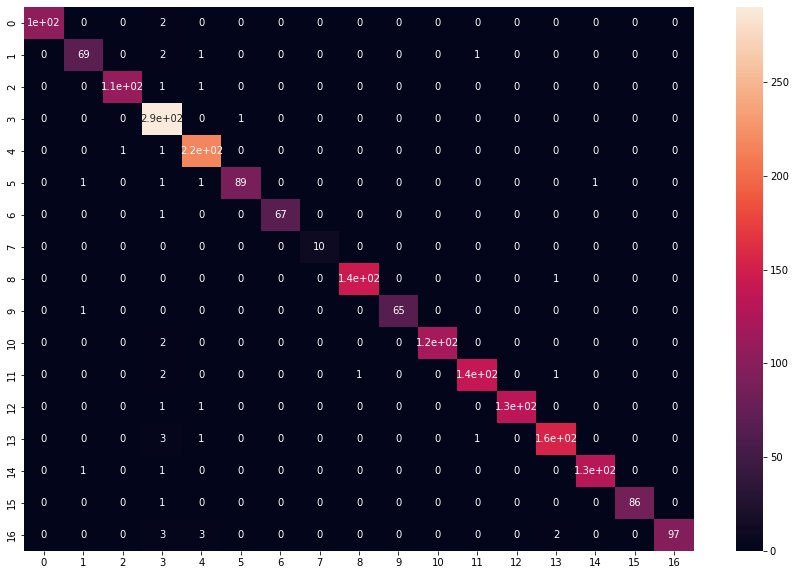

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### 9. Function to Predict Language by taking Text as argument!
This function would do the following:
1. Take text as argument
2. Convert the text into Vectors using Bag of Words Algorithm
3. Predict the Language using Model
4. Find the language corresponding to the predicted value.
5. Return the predicted language.

In [16]:
def predictLanguage(text):
  x = cv.transform([text]).toarray()
  lang = model.predict(x)
  lang = le.inverse_transform(lang)
  return lang[0]

### 10. Function to Translate Text into another Language
Now we would write a function to translate our text into another language. This function would do the following:
1. Create a Dictionary with keys as the Languages and Values as their codes.
2. Take text, original language and language the text needs to be converted as arguments.
3. Initialize the Translator Object in a variable
4. Traslate the text using the translate() function
5. Return the translated text

In [17]:
langs = {
  'Malayalam': 'ml',
  'Portugeese': 'pt',
  'Tamil': 'ta',
  'Italian': 'it',
  'Arabic': 'ar',
  'English': 'en',
  'Spanish': 'es',
  'Greek': 'el',
  'Sweedish': 'sv',
  'Danish': 'da',
  'Dutch': 'nl',
  'Russian': 'ru',
  'German': 'de',
  'Hindi': 'hi',
  'Turkish': 'tr',
  'Kannada': 'kn',
  'French': 'fr'
}

def translateText(text, from_lang, to_lang):
  translator = Translator()
  translatedText = translator.translate(text, src=from_lang, dest=to_lang)
  return translatedText.text


### 11. Result Function
This would be a final function which would take the text and then return the ouput in a formatted manner. This function would do the following:
1. Take Text and the Language to convert as argument
2. Use the previously defined predictLanguage() function to predict the language of the text.
3. Use the previously defined translateText() function to translate the text into the desired language.
4. Return the Language and Translated Text in a formatted way.

In [18]:
def resultingText(text, to_lang):
  lang = predictLanguage(text)
  translatedText = translateText(text, lang, to_lang)
  return f"Text Language: {lang}\nTranslated Text: {translatedText}"

### 12. Testing 2 Languages
Now we are going to test our model and functions on two languages Hindi and Spanish to check if it returns correct output or not.

In [19]:
text = 'hola hermano soy bailarin disco'
result = resultingText(text, 'en')
print(result)


Text Language: Spanish
Translated Text: Hello brother, I'm a disco dancer.


In [20]:
text = 'मेरा नाम पागल है'
result = resultingText(text, 'en')
print(result)


Text Language: Hindi
Translated Text: my name is crazy


In [22]:
file = open('langs.pkl', 'wb')
pickle.dump(langs, file)